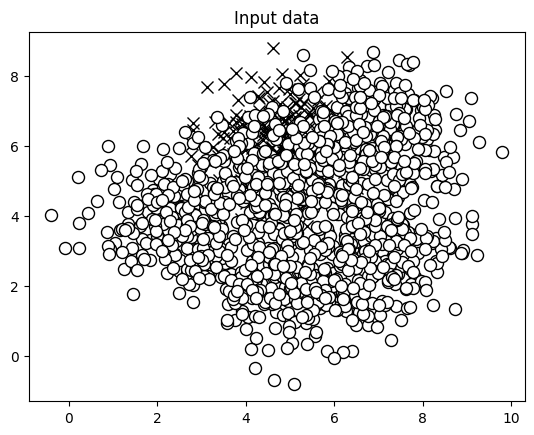

num of class0: 250
num of class1: 1250


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn import model_selection
from sklearn.metrics import classification_report 
%matplotlib inline
%run utilities.ipynb

input_file = 'data_imbalance.txt' 
data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1] 

class_0 = np.array(X[y==0]) 
class_1 = np.array(X[y==1]) 

plt.figure() 
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
            linewidth=1, marker='x') 
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
            edgecolors='black', linewidth=1, marker='o') 
plt.title('Input data') 
plt.show()

print(f"num of class0: {class_0.shape[0]}")
print(f"num of class1: {class_1.shape[0]}")

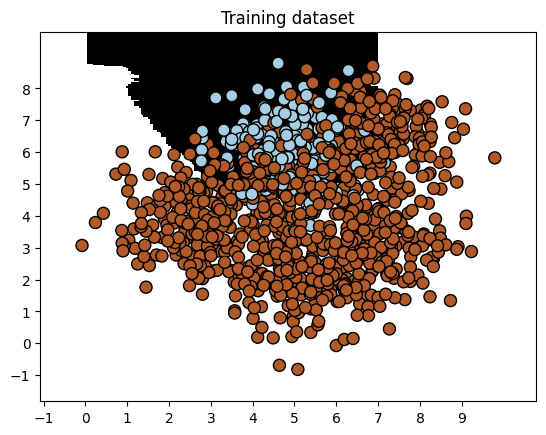

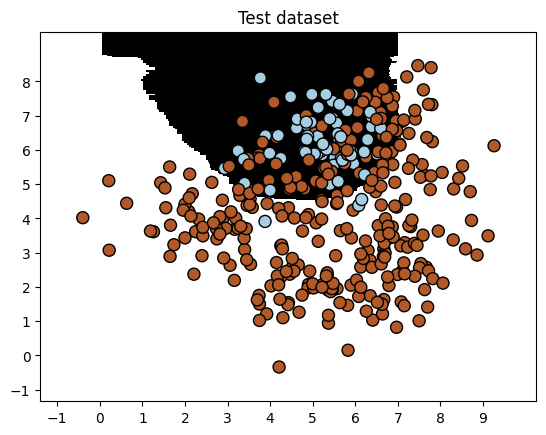

Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.44      0.93      0.60       181
     Class-1       0.98      0.77      0.86       944

    accuracy                           0.80      1125
   macro avg       0.71      0.85      0.73      1125
weighted avg       0.89      0.80      0.82      1125


Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.45      0.94      0.61        69
     Class-1       0.98      0.74      0.84       306

    accuracy                           0.78       375
   macro avg       0.72      0.84      0.73       375
weighted avg       0.88      0.78      0.80       375



In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split( 
            X, y, test_size=0.25, random_state=5) 

params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0,
         'class_weight': 'balanced'
          } 

classifier = ExtraTreesClassifier(**params) 
classifier.fit(X_train, y_train) 
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

y_test_pred = classifier.predict(X_test) 
visualize_classifier(classifier, X_test, y_test, 'Test dataset') 

class_names = ['Class-0', 'Class-1'] 
print("Classifier performance on training dataset\n") 
print(classification_report(y_train, classifier.predict(X_train), 
     target_names=class_names)) 
 
print("\nClassifier performance on test dataset\n") 
print(classification_report(y_test, y_test_pred, target_names=class_names)) 